In [219]:
#Installing packages for Encoding variables
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
#Importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree, metrics
import graphviz
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
%matplotlib inline

In [221]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [222]:
#Connecting to google drive for dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
#Read dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset.csv")

In [224]:
#Explore sample of dataset
data.head()

,Id,Domain,Region,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
0,1,Education,Africa,1,1,1,0,0,4,1,00-04,10-Jun
1,2,Education,Africa,1,1,1,0,0,3,1,00-04,10-Jun
2,3,Education,Africa,1,0,1,0,0,3,1,00-04,10-Jun
3,4,Education,Africa,1,0,1,0,0,1,1,00-04,10-Jun
4,5,Education,Africa,1,1,1,0,0,2,1,00-04,10-Jun


In [225]:
data.shape

(6560, 12)

In [226]:
# Data Exploration

In [227]:
data['Purchased'].value_counts()

0    3674
1    2886
Name: Purchased, dtype: int64

In [228]:
# Check Null Values
data.isna().any()

Id                                   False
Domain                               False
Region                               False
No_of_Products_already_purchased     False
Using_Similar_Product                False
CPQ_Customer                         False
CLM_Customer                         False
IWA_Customer                         False
No_of_times_of_Renewal_              False
Purchased                            False
No_Of_Years_Of_Association_Binned    False
No_Of_Bugs_Reported_Binned           False
dtype: bool

In [229]:
#Unique values for Domain variable
data['Domain'].unique()

array(['Education', 'Finance', 'Healthcare', 'Telecom', 'Insurance',
       'Retail'], dtype=object)

In [230]:
#Unique values for Region variable
data['Region'].unique()

array(['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'South America'], dtype=object)

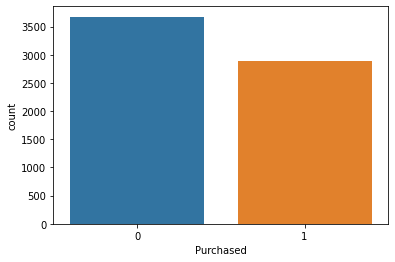

In [231]:
#Plotting chart for the customers who purchased vs who did not purchased the new product
sns.countplot(data=data,x='Purchased')

In [232]:
## Plot Chart Reusable function
def plot_chart(column):
  keys = np.unique(data[column])
  percentage_list = [];

  for key in keys :
    purchased_count = len(data[(data[column] == key) & (data['Purchased'] == 1)])
    total_count = len(data[data[column] == key])
    percentage = ((purchased_count/total_count)*100)
    percentage_list.append(percentage)

  plt.bar(keys, percentage_list)
  plt.xlabel(column)
  plt.ylabel("% of customer purchased the new product")
  plt.show()
  

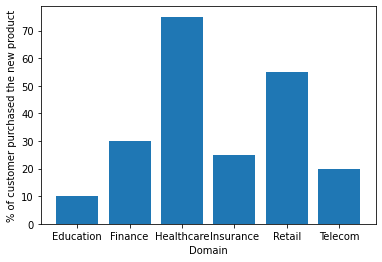

In [233]:
#Sales by Domain
plot_chart('Domain')

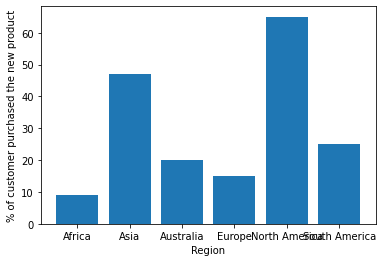

In [234]:
#Sales by Region
plot_chart('Region')

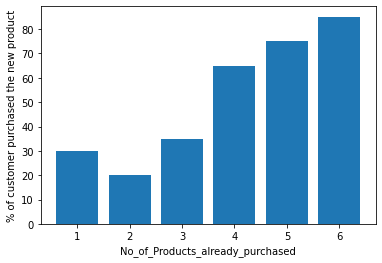

In [235]:
#Sales by No. of products already purchased by the customers
plot_chart('No_of_Products_already_purchased')

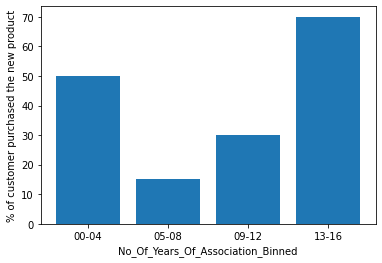

In [236]:
#Formatting the values which were incorrectly picked as date from csv
data['No_Of_Years_Of_Association_Binned'].replace(["12-Sep", "8-May"], ["09-12", "05-08"], inplace=True)
#Sales by No. of years of association
plot_chart('No_Of_Years_Of_Association_Binned')

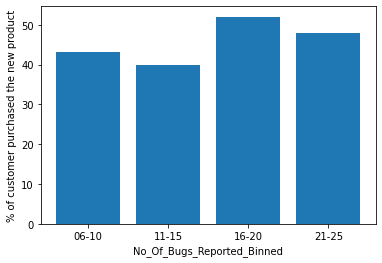

In [237]:
#Formatting the values which were incorrectly picked as date from csv
data['No_Of_Bugs_Reported_Binned'].replace(["10-Jun", "15-Nov"], ["06-10", "11-15"], inplace=True)
#Sales by No. of bugs reported from existing products
plot_chart('No_Of_Bugs_Reported_Binned')

In [238]:
# Data Preprocessing

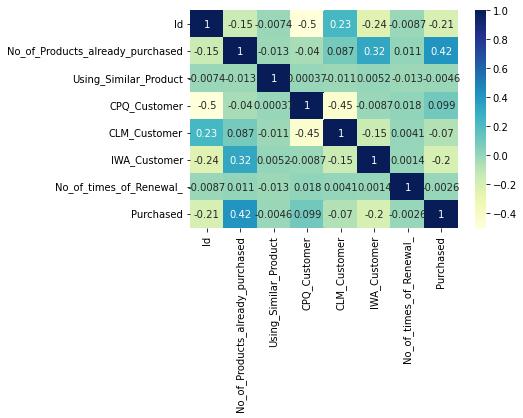

In [239]:
#Plotting heatmap for correlations
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [240]:
# Convert No_Of_Years_Of_Association_Binned to Numerical Values
data['No_Of_Years_Of_Association_Binned'].replace(["00-04", "05-08", "09-12", "13-16"],
                        [1, 2, 3, 4], inplace=True)
data.head()

,Id,Domain,Region,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
0,1,Education,Africa,1,1,1,0,0,4,1,1,06-10
1,2,Education,Africa,1,1,1,0,0,3,1,1,06-10
2,3,Education,Africa,1,0,1,0,0,3,1,1,06-10
3,4,Education,Africa,1,0,1,0,0,1,1,1,06-10
4,5,Education,Africa,1,1,1,0,0,2,1,1,06-10


In [241]:
# Convert No_Of_Bugs_Reported_Binned to Numerical Values
data['No_Of_Bugs_Reported_Binned'].replace(["06-10", "11-15", "16-20", "21-25"],
                        [1, 2, 3, 4], inplace=True)
data.head()

,Id,Domain,Region,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
0,1,Education,Africa,1,1,1,0,0,4,1,1,1
1,2,Education,Africa,1,1,1,0,0,3,1,1,1
2,3,Education,Africa,1,0,1,0,0,3,1,1,1
3,4,Education,Africa,1,0,1,0,0,1,1,1,1
4,5,Education,Africa,1,1,1,0,0,2,1,1,1


In [242]:
# One Hot Encoding the Nominal Variable 'Region'
encoder = ce.OneHotEncoder(cols = 'Region', handle_unknown = 'return_nan', return_df = True, use_cat_names = True)
data = encoder.fit_transform(data)
data.head()

,Id,Domain,Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
0,1,Education,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,4,1,1,1
1,2,Education,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,3,1,1,1
2,3,Education,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,3,1,1,1
3,4,Education,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,1,1,1
4,5,Education,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,2,1,1,1


In [243]:
# One Hot Encoding the Nominal Variable 'Domain'
encoder=ce.OneHotEncoder(cols='Domain',handle_unknown = 'return_nan', return_df = True, use_cat_names = True)
data = encoder.fit_transform(data)
data.head()

,Id,Domain_Education,Domain_Finance,Domain_Healthcare,Domain_Telecom,Domain_Insurance,Domain_Retail,Region_Africa,Region_Asia,Region_Australia,...,Region_South America,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,1,1,0,0,4,1,1,1
1,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,1,1,0,0,3,1,1,1
2,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,0,1,0,0,3,1,1,1
3,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,0,1,0,0,1,1,1,1
4,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,1,1,0,0,2,1,1,1


,Id,Domain_Education,Domain_Finance,Domain_Healthcare,Domain_Telecom,Domain_Insurance,Domain_Retail,Region_Africa,Region_Asia,Region_Australia,...,Region_South America,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned
Id,1.000000,-0.377492,-0.545705,-0.340168,0.519615,0.250000,0.472944,-0.376835,-0.616209,-0.052864,...,0.514068,-0.145942,-0.007383,-0.502654,0.232638,-0.243595,-0.008749,-0.207666,-0.182331,-0.182393
Domain_Education,-0.377492,1.000000,-0.096374,-0.150188,-0.076472,-0.132453,-0.096374,0.990372,-0.127607,-0.052632,...,-0.076472,0.265464,-0.017697,0.059596,0.064679,0.200775,0.003925,-0.156831,0.217724,0.414607
Domain_Finance,-0.545705,-0.096374,1.000000,-0.275010,-0.140028,-0.242536,-0.176471,-0.090497,0.724649,-0.096374,...,-0.140028,-0.033361,0.013705,0.362850,-0.168286,0.203822,0.004525,-0.118602,0.036528,0.157639
Domain_Healthcare,-0.340168,-0.150188,-0.275010,1.000000,-0.218218,-0.377964,-0.275010,-0.150188,0.125988,0.350438,...,-0.218218,-0.022315,0.002063,0.133077,-0.052263,-0.042032,0.001422,0.408926,-0.028132,-0.248805
Domain_Telecom,0.519615,-0.076472,-0.140028,-0.218218,1.000000,-0.192450,-0.140028,-0.076472,-0.192450,-0.076472,...,0.942412,-0.168801,-0.009452,-0.263677,0.275369,-0.193043,-0.002444,-0.161331,-0.288078,-0.105406
Domain_Insurance,0.250000,-0.132453,-0.242536,-0.377964,-0.192450,1.000000,-0.242536,-0.132453,-0.333333,-0.132453,...,-0.192450,-0.126872,0.008273,-0.053552,-0.176616,-0.027615,-0.000157,-0.220922,0.030031,-0.137988
Domain_Retail,0.472944,-0.096374,-0.176471,-0.275010,-0.140028,-0.242536,1.000000,-0.096374,-0.242536,-0.096374,...,-0.091644,0.195645,-0.007642,-0.283540,0.178705,-0.076750,-0.006502,0.092972,0.072300,0.164504
Region_Africa,-0.376835,0.990372,-0.090497,-0.150188,-0.076472,-0.132453,-0.096374,1.000000,-0.132453,-0.052632,...,-0.076472,0.269207,-0.016298,0.059596,0.068911,0.205224,0.002056,-0.161058,0.223162,0.420934
Region_Asia,-0.616209,-0.127607,0.724649,0.125988,-0.192450,-0.333333,-0.242536,-0.132453,1.000000,-0.132453,...,-0.192450,-0.162673,0.020948,0.430371,-0.185846,0.067171,-0.004546,0.035106,-0.180412,-0.017337
Region_Australia,-0.052864,-0.052632,-0.096374,0.350438,-0.076472,-0.132453,-0.096374,-0.052632,-0.132453,1.000000,...,-0.076472,-0.076869,0.003288,0.086460,-0.066512,0.096977,0.013269,-0.110331,0.028005,-0.023338


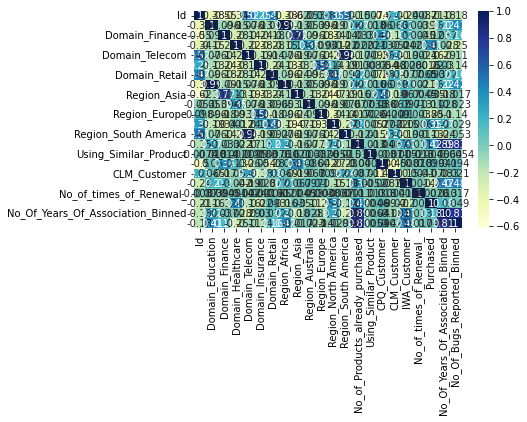

In [244]:
#Plotting heatmap for correlations with new variables formed after pre processing techniques 
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
data.corr()
plt.show()

In [245]:
# Modelling

In [246]:
#Extract dependent variable from dataset
y = data['Purchased']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Purchased, dtype: int64

In [247]:
#Extract set of Independent variables from dataset
x = data.loc[:, ~data.columns.isin(['Purchased', 'Id'])]

In [248]:
#Dividing Train and Test dataset into 75:25 ratio
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(4920, 15)

(1640, 15)

(4920,)

(1640,)

In [249]:
#Decision Tree Training
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3)

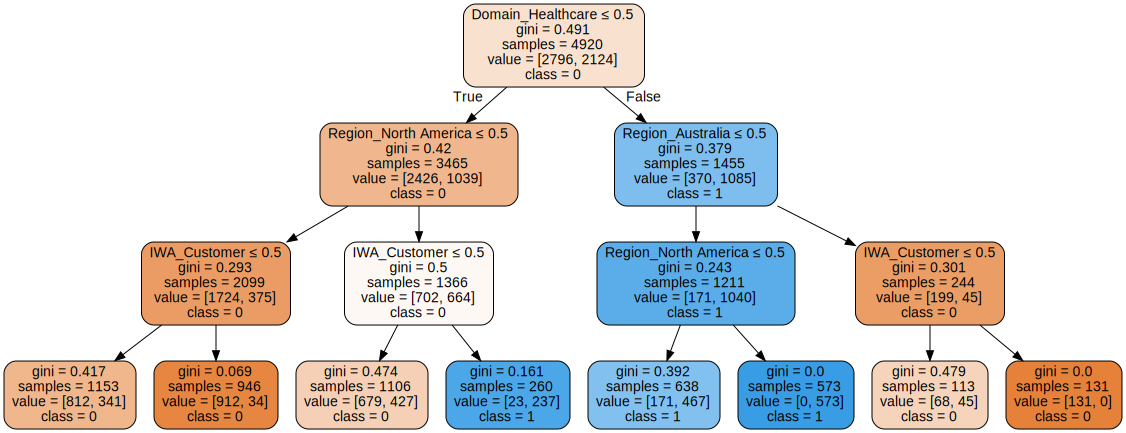

In [250]:
#Plot decision tree
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = train_x.columns, class_names = ['0','1'], filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [251]:
#Predicting from the trained model
classes = clf.predict(test_x)

In [252]:
#Evaluating Model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
print(metrics.roc_auc_score(test_y, classes))

Accuracy Score
0.7774390243902439
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       878
           1       0.87      0.61      0.72       762

    accuracy                           0.78      1640
   macro avg       0.80      0.77      0.77      1640
weighted avg       0.80      0.78      0.77      1640

AUC
0.7663070447629127


Text(0.5, 1.0, 'ROCR Chart')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

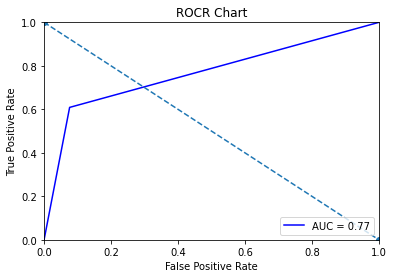

In [253]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [1,0], 'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


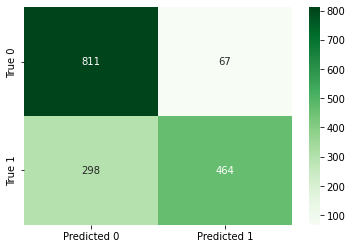

In [254]:
#Printing Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show()

In [255]:
#Logistic Regression Training
log = LogisticRegression()
log.fit(train_x, train_y)

LogisticRegression()

In [256]:
#Predicting from the trained model
classes = log.predict(test_x)
print(classes.size)

1640


In [257]:
#Printing Regression Coefficients
log.coef_

array([[ 1.22403181,  1.98202368,  3.54734084, -3.96967924, -1.529409  ,
        -1.25268478, -1.39721708, -1.08187006, -3.22254366, -1.07463751,
         2.8403571 ,  3.93753452,  0.00606137, -0.89827372, -0.02392446]])

In [258]:
#Printing Regression Coefficients for each variable
coeff = pd.concat([pd.DataFrame(train_x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "Coeff")
coeff.sort_values('Coeff', ascending = False)

,Variable,Coeff
11,Region_South America,3.937535
2,Domain_Healthcare,3.547341
10,Region_North America,2.840357
1,Domain_Finance,1.982024
0,Domain_Education,1.224032
12,Using_Similar_Product,0.006061
14,No_of_times_of_Renewal_,-0.023924
13,IWA_Customer,-0.898274
9,Region_Europe,-1.074638
7,Region_Asia,-1.081870


In [259]:
#Evaluating Model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
print(metrics.roc_auc_score(test_y, classes))

Accuracy Score
0.7024390243902439
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       878
           1       0.70      0.63      0.66       762

    accuracy                           0.70      1640
   macro avg       0.70      0.70      0.70      1640
weighted avg       0.70      0.70      0.70      1640

AUC
0.6979086327193155


Text(0.5, 1.0, 'ROCR Chart')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

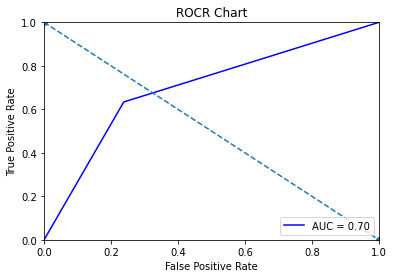

In [260]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [1,0], 'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


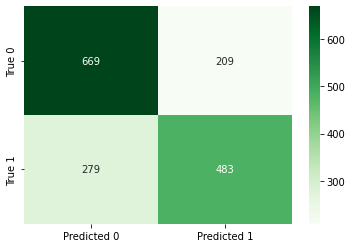

In [261]:
#Printing Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show()

In [262]:
# Naive Bayes Algorithms
nb = BernoulliNB()
nb.fit(train_x, train_y)
classes = nb.predict(test_x)

BernoulliNB()

In [263]:
#Evaluating the model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
print(metrics.roc_auc_score(test_y, classes))

Accuracy Score
0.7317073170731707
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       878
           1       0.69      0.78      0.73       762

    accuracy                           0.73      1640
   macro avg       0.73      0.73      0.73      1640
weighted avg       0.74      0.73      0.73      1640

AUC
0.7346062095313256


Confusion Matrix


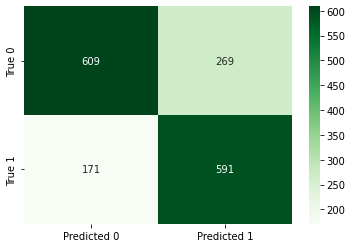

In [264]:
#Printing Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show()

Text(0.5, 1.0, 'ROCR Chart')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

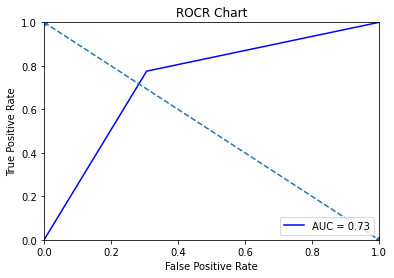

In [265]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [1,0], 'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [266]:
#Random Forest modeling technique
n_estimators = [10, 500, 1000, 2000]
criterion = ['gini', 'entropy']
min_samples_split = [2, 10, 20, 50, 100]
max_depth = [20, 30, 40, 50, None]

In [267]:
#Configuring and training the model
param_grid = {'n_estimators':n_estimators, 'criterion': criterion, 'min_samples_split':min_samples_split, 'max_depth':max_depth}
rf = RandomForestClassifier()
rf_g = RandomizedSearchCV(rf, param_grid, cv = 5, verbose = 2, n_jobs = -1)
rf_g.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 30, 40, 50, None],
                                        'min_samples_split': [2, 10, 20, 50,
                                                              100],
                                        'n_estimators': [10, 500, 1000, 2000]},
                   verbose=2)

In [268]:
#Predicting from the trained model
classes = rf_g.predict(test_x)

In [269]:
rf_g.best_score_

0.8449186991869919

In [270]:
rf_g.best_index_

6

In [271]:
#Evaluating Model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
print(metrics.roc_auc_score(test_y, classes))

Accuracy Score
0.8268292682926829
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       878
           1       0.89      0.72      0.79       762

    accuracy                           0.83      1640
   macro avg       0.84      0.82      0.82      1640
weighted avg       0.84      0.83      0.82      1640

AUC
0.8195433429591233


In [272]:
#XGBoost Model Training
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier()

In [273]:
# make predictions for test data
classes = model.predict(test_x)

In [274]:
#Evaluating Model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
print(metrics.roc_auc_score(test_y, classes))

Accuracy Score
0.8268292682926829
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       878
           1       0.89      0.72      0.79       762

    accuracy                           0.83      1640
   macro avg       0.84      0.82      0.82      1640
weighted avg       0.84      0.83      0.82      1640

AUC
0.8195433429591233


In [275]:
# Market Basket Analysis
bskt_sets = data[['CPQ_Customer', 'CLM_Customer', 'IWA_Customer', 'Purchased']]
#Dividing Train and Test dataset into 75:25 ratio
mba_train = bskt_sets.head(4920) 
mba_test = bskt_sets.tail(1640)
mba_train.shape
mba_test.shape

(4920, 4)

(1640, 4)

In [276]:
frequent_items = apriori(mba_train, min_support = 0.05, use_colnames =True)
frequent_items.sort_values('support', ascending = False)

,support,itemsets
0,0.691667,(CPQ_Customer)
1,0.467683,(CLM_Customer)
3,0.453049,(Purchased)
2,0.387805,(IWA_Customer)
6,0.301829,"(CPQ_Customer, Purchased)"
4,0.258333,"(CPQ_Customer, CLM_Customer)"
5,0.236179,"(CPQ_Customer, IWA_Customer)"
8,0.220528,"(Purchased, CLM_Customer)"
7,0.155894,"(IWA_Customer, CLM_Customer)"
11,0.134350,"(CPQ_Customer, Purchased, CLM_Customer)"


In [277]:
#Finding Association Rules
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Purchased),(CLM_Customer),0.453049,0.467683,0.220528,0.486765,1.040802,0.008645,1.037181
1,(CLM_Customer),(Purchased),0.467683,0.453049,0.220528,0.471534,1.040802,0.008645,1.034979
2,"(CPQ_Customer, CLM_Customer)",(IWA_Customer),0.258333,0.387805,0.103252,0.399685,1.030635,0.003069,1.019790
3,(IWA_Customer),"(CPQ_Customer, CLM_Customer)",0.387805,0.258333,0.103252,0.266247,1.030635,0.003069,1.010786
4,"(CPQ_Customer, CLM_Customer)",(Purchased),0.258333,0.453049,0.134350,0.520063,1.147918,0.017312,1.139631
5,(Purchased),"(CPQ_Customer, CLM_Customer)",0.453049,0.258333,0.134350,0.296546,1.147918,0.017312,1.054321


In [278]:
#Sorting rules based on descending support values
rules.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Purchased),(CLM_Customer),0.453049,0.467683,0.220528,0.486765,1.040802,0.008645,1.037181
1,(CLM_Customer),(Purchased),0.467683,0.453049,0.220528,0.471534,1.040802,0.008645,1.034979
4,"(CPQ_Customer, CLM_Customer)",(Purchased),0.258333,0.453049,0.134350,0.520063,1.147918,0.017312,1.139631
5,(Purchased),"(CPQ_Customer, CLM_Customer)",0.453049,0.258333,0.134350,0.296546,1.147918,0.017312,1.054321
2,"(CPQ_Customer, CLM_Customer)",(IWA_Customer),0.258333,0.387805,0.103252,0.399685,1.030635,0.003069,1.019790
3,(IWA_Customer),"(CPQ_Customer, CLM_Customer)",0.387805,0.258333,0.103252,0.266247,1.030635,0.003069,1.010786


In [279]:
#Sorting rules based on descending confidence values
rules.sort_values('confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(CPQ_Customer, CLM_Customer)",(Purchased),0.258333,0.453049,0.134350,0.520063,1.147918,0.017312,1.139631
0,(Purchased),(CLM_Customer),0.453049,0.467683,0.220528,0.486765,1.040802,0.008645,1.037181
1,(CLM_Customer),(Purchased),0.467683,0.453049,0.220528,0.471534,1.040802,0.008645,1.034979
2,"(CPQ_Customer, CLM_Customer)",(IWA_Customer),0.258333,0.387805,0.103252,0.399685,1.030635,0.003069,1.019790
5,(Purchased),"(CPQ_Customer, CLM_Customer)",0.453049,0.258333,0.134350,0.296546,1.147918,0.017312,1.054321
3,(IWA_Customer),"(CPQ_Customer, CLM_Customer)",0.387805,0.258333,0.103252,0.266247,1.030635,0.003069,1.010786


In [280]:
#Sorting rules based on descending lift values
rules.sort_values('lift', ascending = False).head(10)
#Observation - CPQ and CLM customers are more likely to buy the new product

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(CPQ_Customer, CLM_Customer)",(Purchased),0.258333,0.453049,0.134350,0.520063,1.147918,0.017312,1.139631
5,(Purchased),"(CPQ_Customer, CLM_Customer)",0.453049,0.258333,0.134350,0.296546,1.147918,0.017312,1.054321
0,(Purchased),(CLM_Customer),0.453049,0.467683,0.220528,0.486765,1.040802,0.008645,1.037181
1,(CLM_Customer),(Purchased),0.467683,0.453049,0.220528,0.471534,1.040802,0.008645,1.034979
2,"(CPQ_Customer, CLM_Customer)",(IWA_Customer),0.258333,0.387805,0.103252,0.399685,1.030635,0.003069,1.019790
3,(IWA_Customer),"(CPQ_Customer, CLM_Customer)",0.387805,0.258333,0.103252,0.266247,1.030635,0.003069,1.010786


In [281]:
#Testing the Market Basket Analysis Result
cpq_clm_customers = mba_test[(mba_test['CPQ_Customer'] == 1) & (mba_test['CLM_Customer'] == 1)]
test_y = cpq_clm_customers[['Purchased']]
predicted_result = data[data['Purchased'] == 1].head(128)
classes = predicted_result[['Purchased']]

In [282]:
#Evaluating Model
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))

Accuracy Score
0.8828125


Confusion Matrix


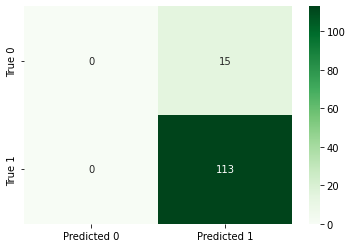

In [283]:
#Printing Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap = "Greens", fmt = "d", xticklabels = lbl1, yticklabels = lbl2)
plt.show()

In [284]:
#Clustering the Customers
num_of_clusters = range(2,10)
error = []

In [285]:
#Finding the optimal number of clusters using elbow method.
for num_clusters in num_of_clusters:
	clusters = KMeans(num_clusters)
	clusters.fit(data)
	error.append(clusters.inertia_/100)
df = pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term" : error})
df

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

,Cluster_Numbers,Error_Term
0,2,5.881319e+07
1,3,2.613988e+07
2,4,1.470486e+07
3,5,9.410673e+06
4,6,6.535327e+06
5,7,4.802093e+06
6,8,3.678842e+06
7,9,2.905533e+06


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of cluster')

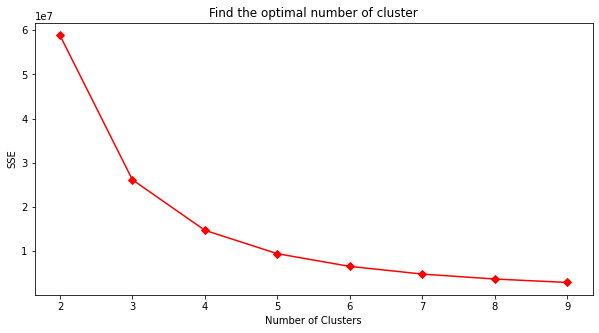

In [286]:
#Printing the graph for output of Elbow method
plt.figure(figsize=(10,5))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()

In [287]:
#Creating 4 clusters based on the output of elbow method for finding optimal number of clusters
clusters = KMeans(4)
clusters.fit(data)
clusters.labels_

KMeans(n_clusters=4)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [288]:
#Labeling the cluster numbers in dataset 
data['Cluster'] = clusters.labels_
data.head()
data.tail()
data.shape

,Id,Domain_Education,Domain_Finance,Domain_Healthcare,Domain_Telecom,Domain_Insurance,Domain_Retail,Region_Africa,Region_Asia,Region_Australia,...,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned,Cluster
0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0,4,1,1,1,2
1,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0,3,1,1,1,2
2,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,3,1,1,1,2
3,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,1,1,1,1,2
4,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0,2,1,1,1,2


,Id,Domain_Education,Domain_Finance,Domain_Healthcare,Domain_Telecom,Domain_Insurance,Domain_Retail,Region_Africa,Region_Asia,Region_Australia,...,No_of_Products_already_purchased,Using_Similar_Product,CPQ_Customer,CLM_Customer,IWA_Customer,No_of_times_of_Renewal_,Purchased,No_Of_Years_Of_Association_Binned,No_Of_Bugs_Reported_Binned,Cluster
6555,142,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,1,1,1,1,1,0,4,4,2
6556,143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,0,1,1,1,2,0,4,4,2
6557,144,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,0,1,1,1,4,0,4,4,2
6558,145,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,0,1,1,1,1,0,4,4,2
6559,146,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,0,1,1,1,3,0,4,4,2


(6560, 23)

In [289]:
#Count of customers in each cluster
print(data[(data['Cluster'] == 0)].shape[0])
print(data[(data['Cluster'] == 1)].shape[0])
print(data[(data['Cluster'] == 2)].shape[0])
print(data[(data['Cluster'] == 3)].shape[0])

1647
1638
1631
1644


In [290]:
#Count of customers who purchased the product in each cluster
print(data[(data['Cluster'] == 0) & (data['Purchased'] == 1)].shape[0])
print(data[(data['Cluster'] == 1) & (data['Purchased'] == 1)].shape[0])
print(data[(data['Cluster'] == 2) & (data['Purchased'] == 1)].shape[0])
print(data[(data['Cluster'] == 3) & (data['Purchased'] == 1)].shape[0])

672
1157
647
410
